# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
mail = pd.read_csv('/content/emails.csv')

In [ ]:
mail.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
mail.shape

(5172, 3002)

In [ ]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
#dropping 'Email no.' column
mail.drop(columns=['Email No.'], inplace=True)
mail.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
mail.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [ ]:
#Separating the features and the labels
X=mail.iloc[:, :mail.shape[1]-1]
y=mail.iloc[:, -1]
X.shape, y.shape

((5172, 3000), (5172,))

In [ ]:
#splitting into training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=8)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5172, 3000) (4396, 3000) (776, 3000)


In [ ]:
X = mail.iloc[: , :-1].values
Y = mail.iloc[: , :4].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_taining_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_taining_data)

Accuracy on training data :  0.8912647861692448


In [ ]:
#prediction on test data

prediction_on_test_data = classifier.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_test_data)

Accuracy on training data :  0.8350515463917526


[[437 113]
 [ 15 211]]


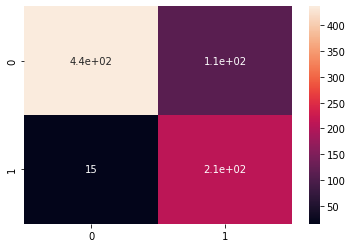

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC

In [ ]:
models={"Linear SVM":LinearSVC(random_state=8, max_iter=3000),
        "RBF SVM":SVC(kernel="rbf", random_state=8)
       }
from sklearn.metrics import accuracy_score

In [ ]:
for model_name, model in models.items():
    y_pred2=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for {model_name} model : {accuracy_score(y_test, y_pred2)}")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy for Linear SVM model : 0.9355670103092784
Accuracy for RBF SVM model : 0.9381443298969072


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[437 113]
 [ 15 211]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       550
           1       0.65      0.93      0.77       226

    accuracy                           0.84       776
   macro avg       0.81      0.86      0.82       776
weighted avg       0.87      0.84      0.84       776



[[549   1]
 [ 47 179]]


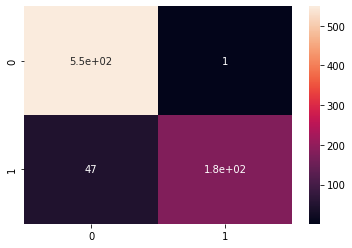

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[549   1]
 [ 47 179]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       550
           1       0.99      0.79      0.88       226

    accuracy                           0.94       776
   macro avg       0.96      0.90      0.92       776
weighted avg       0.94      0.94      0.94       776

